In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import shap
import seaborn as sns

import warnings
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions

shap.initjs()
warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv


In [2]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [3]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [4]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [5]:
# Selección de características y variable objetivo
y = df['aprobado']
X = df[
    [
        "exitosos",
        "fallidos",
        "hito1",
        "hito2",
        "e0",
        "e1",
        "e3",
        "e4",
        "e6",
        "e7",
        "e9",
        "e10",
        "e11",
        "e12",
        "e13",
        "e17",
        "e18",
        "e21",
        "e22",
        "e23",
        "e25",
        "e26",
        "e28",
        "e29",
        "e32",
        "e35",
        "e37",
        "e38",
        "e42",
        "e44"
    ]
]

In [6]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# *Comparación de Métricas entre Modelos*

`Accuracy (Precisión)`:
El accuracy, o precisión, es una métrica que mide la proporción de instancias clasificadas correctamente sobre el total de instancias en los datos de prueba. En otras palabras, es la capacidad del modelo para predecir correctamente tanto las instancias positivas como las negativas. Un valor de accuracy alto indica un buen rendimiento general del modelo en la clasificación.
+ `Fórmula:
Accuracy = (Verdaderos Positivos + Verdaderos Negativos) / Total de instancias`

`Precision (Precisión)`:
La precision es una métrica que mide la proporción de instancias clasificadas como positivas que son realmente positivas. Es la capacidad del modelo para evitar hacer falsas afirmaciones de que una instancia pertenece a la clase positiva cuando no lo hace. Una precision alta indica que el modelo tiene una baja tasa de falsos positivos.
+ `Fórmula:
Precision = Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)`

`Recall (Recall o Sensibilidad)`:
El recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de instancias positivas que son correctamente identificadas por el modelo. Es la capacidad del modelo para detectar y clasificar correctamente las instancias positivas. Un recall alto indica que el modelo tiene una baja tasa de falsos negativos.
+ `Fórmula:
Recall = Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)`

`F1 Score`:
El F1 score es una métrica que combina la precision y el recall en una sola medida. Es la media armónica de la precision y el recall, y proporciona una evaluación equilibrada del rendimiento del modelo. El F1 score es especialmente útil cuando hay un desequilibrio entre las clases o cuando se desea tener un equilibrio entre la precision y el recall.
+ `Fórmula:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)`

`K-Fold Cross-Validation (Validación cruzada de K particiones)`:
La validación cruzada de K particiones, o K-Fold CV, es una técnica de evaluación de modelos que divide el conjunto de datos en K particiones (subconjuntos) de igual tamaño. En cada iteración del proceso de validación cruzada, se utiliza una de las particiones como conjunto de prueba y las K-1 particiones restantes como conjunto de entrenamiento. Esto se repite K veces, utilizando una partición diferente como conjunto de prueba en cada iteración. Al final, se calcula el promedio de las métricas de evaluación obtenidas en cada iteración para tener una medida general del rendimiento del modelo.

`Stratified K-Fold Cross-Validation (Validación cruzada estratificada de K particiones)`:
La validación cruzada estratificada de K particiones, o Stratified K-Fold CV, es una variante de K-Fold CV que tiene en cuenta la distribución de las clases en los datos al realizar la partición. En lugar de realizar la partición de forma aleatoria, Stratified K-Fold CV garantiza que la proporción de clases en cada partición sea lo más similar posible a la proporción de clases en el conjunto de datos original. Esto es especialmente útil cuando hay un desequilibrio entre las clases en los datos.

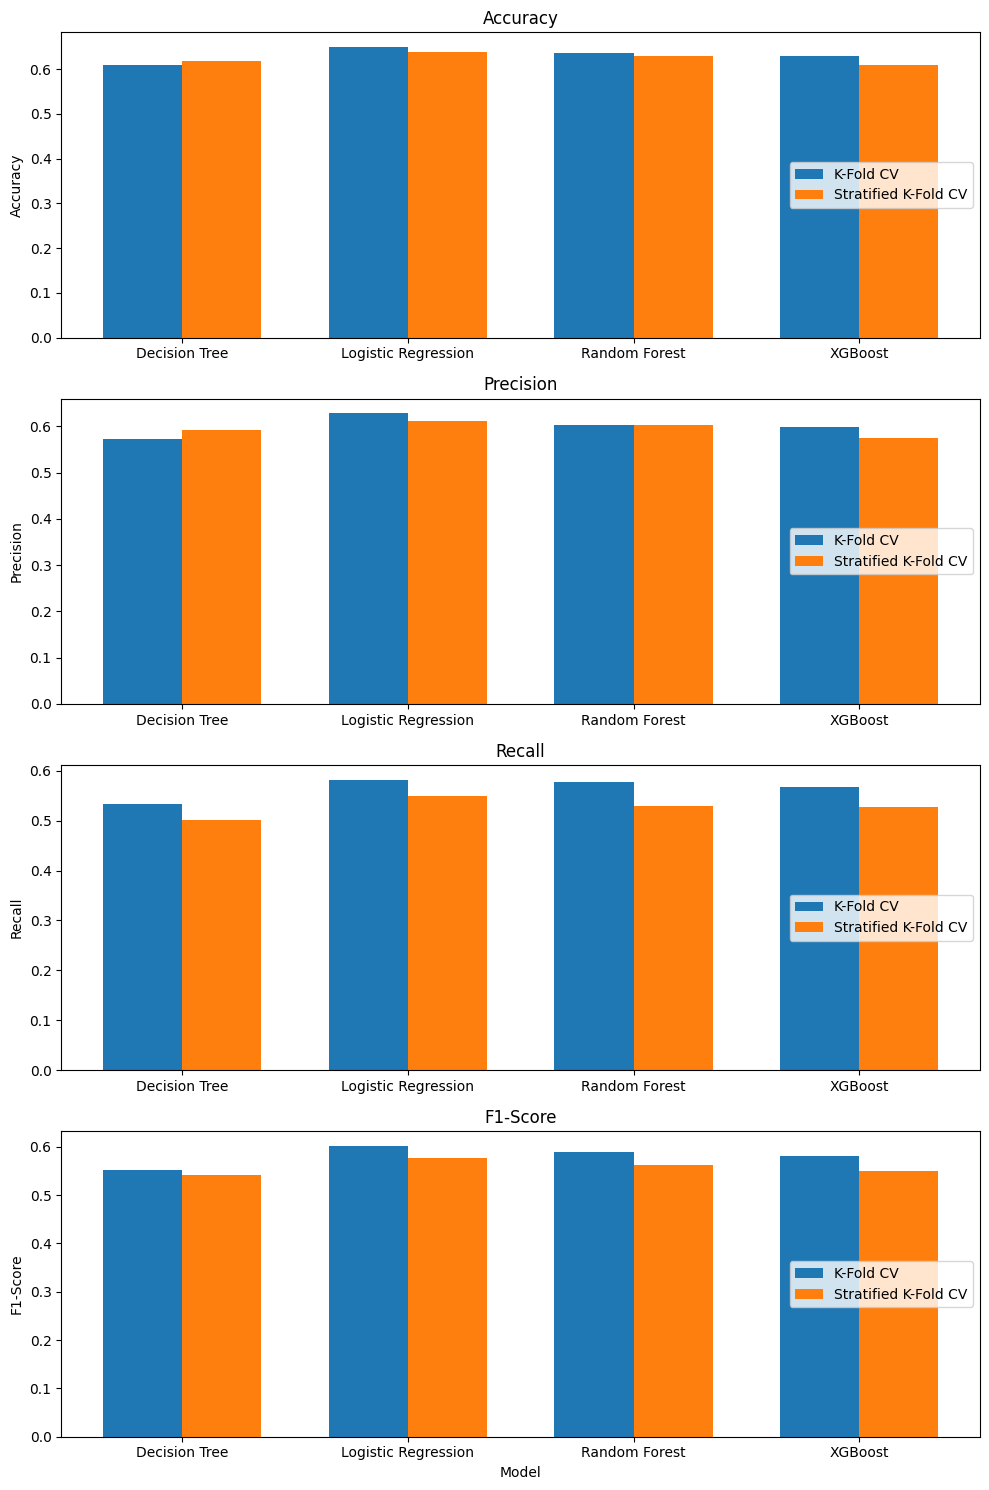

In [7]:
# Definir los clasificadores
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Definir los métodos de validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Definir los modelos y nombres de los modelos
models = [dt_classifier, lr_classifier, rf_classifier, xgb_classifier]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_kfold = []
results_skf = []

# Realizar validación cruzada y calcular las métricas para cada modelo
for model, model_name in zip(models, model_names):
    scores_kfold = []
    scores_skf = []
    
    for train_index, test_index in kfold.split(X_train):
        # Dividir los datos en entrenamiento y prueba para K-Fold CV
        X_train_kfold, X_test_kfold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kfold, y_test_kfold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Entrenar y predecir con el modelo en K-Fold CV
        model.fit(X_train_kfold, y_train_kfold)
        y_pred_kfold = model.predict(X_test_kfold)
        
        # Calcular las métricas en K-Fold CV
        accuracy = accuracy_score(y_test_kfold, y_pred_kfold)
        precision = precision_score(y_test_kfold, y_pred_kfold)
        recall = recall_score(y_test_kfold, y_pred_kfold)
        f1 = f1_score(y_test_kfold, y_pred_kfold)
        
        scores_kfold.append([accuracy, precision, recall, f1])
        
    for train_index, test_index in skf.split(X_train, y_train):
        # Dividir los datos en entrenamiento y prueba para Stratified K-Fold CV
        X_train_skf, X_test_skf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_skf, y_test_skf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Entrenar y predecir con el modelo en Stratified K-Fold CV
        model.fit(X_train_skf, y_train_skf)
        y_pred_skf = model.predict(X_test_skf)
        
        # Calcular las métricas en Stratified K-Fold CV
        accuracy = accuracy_score(y_test_skf, y_pred_skf)
        precision = precision_score(y_test_skf, y_pred_skf)
        recall = recall_score(y_test_skf, y_pred_skf)
        f1 = f1_score(y_test_skf, y_pred_skf)
        
        scores_skf.append([accuracy, precision, recall, f1])
        
    results_kfold.append([model_name] + np.mean(scores_kfold, axis=0).tolist())
    results_skf.append([model_name] + np.mean(scores_skf, axis=0).tolist())

# Crear DataFrames con los resultados de K-Fold CV y Stratified K-Fold CV
results_kfold = pd.DataFrame(results_kfold, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_skf = pd.DataFrame(results_skf, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Crear el gráfico de barras para comparar las métricas
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = results_kfold['Model']

fig, axes = plt.subplots(len(metric_names), 1, figsize=(10, 15))

bar_width = 0.35
index = np.arange(len(model_names))

for i, metric_name in enumerate(metric_names):
    # Graficar las barras para K-Fold CV y Stratified K-Fold CV
    axes[i].bar(index, results_kfold[metric_name], bar_width, label='K-Fold CV')
    axes[i].bar(index + bar_width, results_skf[metric_name], bar_width, label='Stratified K-Fold CV')
    axes[i].set_title(metric_name)
    axes[i].set_ylabel(metric_name)
    axes[i].set_xticks(index + bar_width / 2)
    axes[i].set_xticklabels(model_names)
    axes[i].legend(loc='center right')

plt.xlabel('Model')
plt.tight_layout()
plt.savefig('E:\\dev\\tesis\\LaTeX\\img\\compara_algoritmos\\metricasEntreModelos.png')
plt.show()

# *Medidas de rendimiento de cada modelo*
`MSE (Mean Squared Error) - Error Cuadrático Medio`: Es la media de los errores al cuadrado entre las predicciones y los valores reales. El MSE proporciona una medida de la calidad general del modelo, donde valores más bajos indican que las predicciones se ajustan mejor a los datos reales.

`MAE (Mean Absolute Error) - Error Absoluto Medio`: Es la media de los errores absolutos entre las predicciones y los valores reales. El MAE representa la magnitud promedio de los errores de predicción y se utiliza para evaluar la precisión del modelo. Valores más bajos indican una mejor precisión.

`R2 (Coeficiente de determinación)`: Es una medida de qué tan bien se ajustan las predicciones del modelo a los datos reales. R2 varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos. Un valor más cercano a 1 indica un mejor ajuste del modelo.

               Model       MSE       MAE  R2 Score
0  Linear Regression  0.274578  0.442979 -0.108554
1      Decision Tree  0.311981  0.407679 -0.286860
2                KNN  0.253264  0.417579 -0.022175


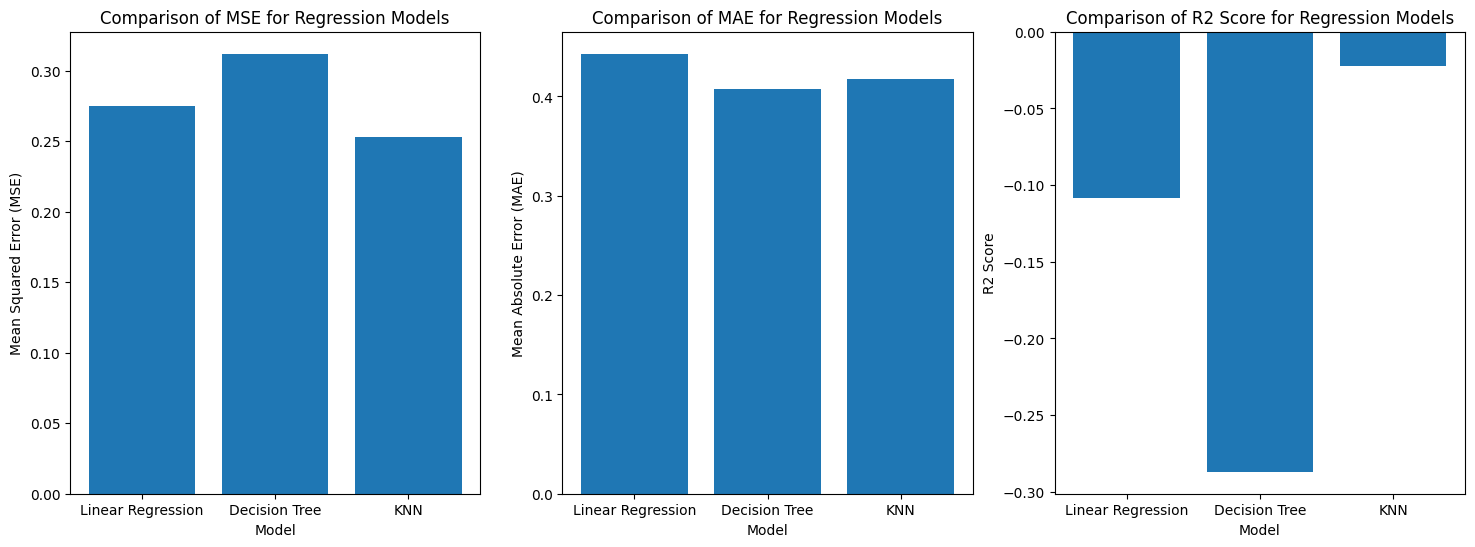

In [8]:
# Define una función para realizar el entrenamiento y evaluación de los modelos con Cross Validation y obtener las medidas de rendimiento
def evaluate_model(model, X, y, cv):
    mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    mae_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    return mse_scores, mae_scores, r2_scores

# Entrena y evalúa el modelo de regresión lineal utilizando Cross Validation con StratifiedKFold
linear_reg = LinearRegression()
linear_mse, linear_mae, linear_r2 = evaluate_model(linear_reg, X_train, y_train, cv=StratifiedKFold(n_splits=5))

# Entrena y evalúa el modelo de árbol de decisión utilizando Cross Validation con StratifiedKFold
decision_tree_reg = DecisionTreeRegressor()
tree_mse, tree_mae, tree_r2 = evaluate_model(decision_tree_reg, X_train, y_train, cv=StratifiedKFold(n_splits=5))

# Entrena y evalúa el modelo de K vecinos más cercanos (KNN) utilizando Cross Validation con StratifiedKFold
knn_reg = KNeighborsRegressor()
knn_mse, knn_mae, knn_r2 = evaluate_model(knn_reg, X_train, y_train, cv=StratifiedKFold(n_splits=5))

# Calcula el promedio de las medidas de rendimiento para cada modelo
linear_mse_avg = np.mean(linear_mse)
linear_mae_avg = np.mean(linear_mae)
linear_r2_avg = np.mean(linear_r2)

tree_mse_avg = np.mean(tree_mse)
tree_mae_avg = np.mean(tree_mae)
tree_r2_avg = np.mean(tree_r2)

knn_mse_avg = np.mean(knn_mse)
knn_mae_avg = np.mean(knn_mae)
knn_r2_avg = np.mean(knn_r2)

# Crea los gráficos de las medidas de rendimiento para cada modelo
labels = ['Linear Regression', 'Decision Tree', 'KNN']
mse_scores = [linear_mse_avg, tree_mse_avg, knn_mse_avg]
mae_scores = [linear_mae_avg, tree_mae_avg, knn_mae_avg]
r2_scores = [linear_r2_avg, tree_r2_avg, knn_r2_avg]

# Muestra los resultados en columnas
results_df = pd.DataFrame({
    'Model': labels,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R2 Score': r2_scores
})
print(results_df)

# Grafico de las medidas de rendimiento
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(labels, mse_scores)
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].set_title('Comparison of MSE for Regression Models')

ax[1].bar(labels, mae_scores)
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Mean Absolute Error (MAE)')
ax[1].set_title('Comparison of MAE for Regression Models')

ax[2].bar(labels, r2_scores)
ax[2].set_xlabel('Model')
ax[2].set_ylabel('R2 Score')
ax[2].set_title('Comparison of R2 Score for Regression Models')

plt.savefig('E:\\dev\\tesis\\LaTeX\\img\\compara_algoritmos\\rendimientPorModelo.png')
plt.show()